###  Titanic_train.csv 파일을 data라는 변수에 불러오고, PassengerId를 index로 지정을 하시오!!!   
필요한 패키지는 numpy / pandas / matplolib.pyplot

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [4]:
# titanic_train.csv파일 불러오기
# ---> csv : 구분자 : ,
# ---> 파일의 경로는 상대경로 or 절대경로

# pandas의 데이터 타입 Series, DataFrame의 가장 큰 특징은 무엇?
# ---> Series ---> 인덱스(태생적으로 몇 번째 정수인 , 내가만든 인덱스)

# 쌩 파이썬의 리스트 --> 속도적인 부분이 제약. (연속적으로 배치 보장은 안됨)
# numpy : array ---> 속도!!!!(값들을 연속적으로 메모리상 매치)

data = pd.read_csv("titanic_train.csv",index_col = "PassengerId")

In [5]:
data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


* 받은 데이터의 간략적인 정보 확인하세요!!

In [6]:
# 수치 데이터에 대한 간략한 4분위수와 평균 등..
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


* 데이터들에서 NaN이 없는지 확인!!!

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


* 항목별로 이상한 데이터들의 비율을 계산하시오!!!

In [11]:
for col in data.columns:
    print(str(col), data[col].isnull().sum() /data.shape[0], "%")


Survived 0.0 %
Pclass 0.0 %
Name 0.0 %
Sex 0.0 %
Age 0.19865319865319866 %
SibSp 0.0 %
Parch 0.0 %
Ticket 0.0 %
Fare 0.0 %
Cabin 0.7710437710437711 %
Embarked 0.002244668911335578 %


### 참고 : 데이터 항목 설명[ surveved : 생존여부(0/1), Pclass : 티켓의 클래스(1은 1st, 2는 2nd ..), name : 승객이름, sex : 승객성별, Age : 승객나이, SibSp : 함께 탑승한 형재와 배우자의 수, parch : 함께 탑승한 부모, 아이의 수, ticket: 티켓번호, Fare: 탑승료, cabin : 객실번호, embarked :탑승항구(C:Cherboug, Q :Queenstown, S:south ampton)] 

* 탑승항구가 Cherboug 이면서, 탑승료를 200 초과로 지불한 사람들에 대한 데이터를 추리고, head로 앞에 불러서 확인!

In [14]:
# 불리안의 장접 ----> 조건검색!!!!!!!
# T/F --> 불리언
# 인덱싱 ---> 불리언 참값에 대한 자료만 보여준다..

data[(data['Embarked'] == "C") & (data.Fare > 200)]


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
119,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,B58 B60,C
259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
300,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.0,0,1,PC 17558,247.5208,B58 B60,C
312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
378,0,1,"Widener, Mr. Harry Elkins",male,27.0,0,2,113503,211.5000,C82,C
381,1,1,"Bidois, Miss. Rosalie",female,42.0,0,0,PC 17757,227.5250,NaN,C
558,0,1,"Robbins, Mr. Victor",male,NaN,0,0,PC 17757,227.5250,NaN,C
680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
701,1,1,"Astor, Mrs. John Jacob (Madeleine Talmadge Force)",female,18.0,1,0,PC 17757,227.5250,C62 C64,C


* 위의 조건에(항구/요금) 해당하는 것들을 요금에 대한 기준으로 정리를 하세요(요금이 높은 사람부터 낮은 사람 순서대로.)

In [16]:
data[(data['Embarked'] == "C") & (data.Fare > 200)].sort_values(by="Fare", ascending=False).head(3)



,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C


* 나이에 대항 카테고리를 정리하는 함수를 만들고(기준은 30미만은 1, 30이상~55미만은 2, 그 이상은 3으로 코딩)하는 함수 만들기.

In [17]:
def age_category(age):
    if age < 30:
        return 1
    elif age < 55: # 30이상인 애들만. 30<age<55
        return 2
    else:
        return 3

* 위의 나이를 분류하는 함수를 바탕으로 Age_catogory하는 컬럼을 만들어서 생성하시오!!!

In [20]:
#방법1
data['Age_category'] = data['Age'].apply(age_category)

In [21]:
# 방법2
age_cat = [age_category(age) for age in data.Age]
data['Age_category'] = age_cat

In [22]:
# 방법3 -> lambda apply 
data["Age"].apply(lambda x : 1 if x < 30 else( 2 if x <50 else 3) )


PassengerId
1      1
2      2
3      1
4      2
5      2
      ..
887    1
888    1
889    3
890    1
891    2
Name: Age, Length: 891, dtype: int64

* 성별이 남성, 성별이 여성인 사람들의 각각 전체 수는?

In [34]:
(data['Sex']=='male').sum(), (data['Sex']=='female').sum()

(577, 314)

* 성별에 대해서 남성/여성이 어떻게 분포하는지 확인

In [36]:
data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

<AxesSubplot:title={'center':'Male & Female'}>

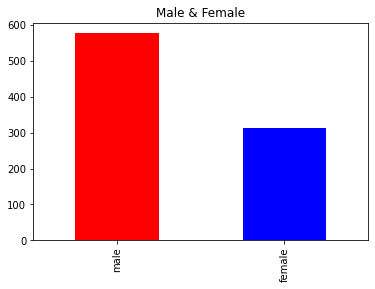

In [40]:
data["Sex"].value_counts().plot(kind="bar",title="Male & Female",color=['red','blue'])

* 선실 등급 별로 성별이 어떻게 분포하는지 확인

In [41]:
pd.pivot_table(data, index=['Pclass'],
               columns=['Sex'],
              values=['Fare'],
              aggfunc='count',
              margins=True)

Fare          
Sex    female male  All
Pclass                 
1          94  122  216
2          76  108  184
3         144  347  491
All       314  577  891

* crosstab 에서도 아래와 같이 꾸밀 수 있음!!

In [43]:
pd.crosstab(data['Pclass'], data['Sex'],margins=True)

Sex,female,male,All
Pclass,,,
1,94,122,216
2,76,108,184
3,144,347,491
All,314,577,891


* 아래 그림과 같이 Pclass에 대한 히스토그램을 그리는데, 남자/여자/전체에 대해서 나타날 수 있도록 그리시오.

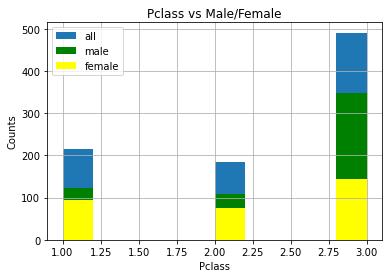

In [48]:
data['Pclass'].hist(label="all")

data[data['Sex']=='male']["Pclass"].hist(color = "green", label="male")
data[data['Sex']=='female']["Pclass"].hist(color = "yellow", label="female")

plt.title("Pclass vs Male/Female")
plt.xlabel("Pclass")
plt.ylabel('Counts')
plt.legend(loc=2)

* 요금(fare)에 대한 평균/ 중앙값(median)/표준편차를 구해보시오.

In [12]:
round(12345.67891234,3)

12345.679

In [50]:
round(data['Fare'].mean(),3)

32.204

In [52]:
round(data['Fare'].median(),3)

14.454

* 아래 그래프와 같이 생존 여부에 대한 나이별로 그래프를 나타내보시오!

<AxesSubplot:>

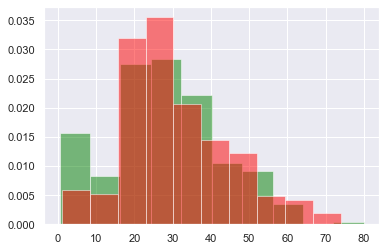

In [92]:
# 전체 데이터 중에서 생존한 사람들에 대한 것을 추리고, 관심은 Age
data[data["Survived"]==1]["Age"].hist(color="green",
                                     label="Survived",
                                     alpha=.5,
                                     density=True)
data[data["Survived"]==0]["Age"].hist(color="red",
                                     label="Death",
                                     alpha=.5,
                                     density=True)

* seaborn 패키지를 로드하세요.

In [59]:
import seaborn as sns
sns.set()

* 아래 그림과 같이 생존 여부에 대한 나이별로 boxplot를 그려보세요.

<AxesSubplot:xlabel='Survived', ylabel='Age'>

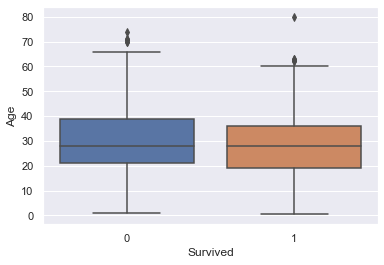

In [60]:
# seaborn패키지의 기본 컨셉은 어떤 그래프를  data, x축, y축, 기타옵션 등으로 
sns.boxplot(x=data['Survived'],y=data['Age'])

* 생존자한 사람들의 나이 평균, 생존하지 못한 사람들의 나이 평균을 구하세요.

In [62]:
# 데이터를 내가 원하는 기준으로 묶어서 볼때 : groupby
data.groupby('Survived')["Age"].mean()

Survived
0    30.626179
1    28.343690
Name: Age, dtype: float64

* 위의 결과들을 보고, 본인만의 기준을 가지고 (젊은 생존자의 구분 : 예 30, 나이든 생존자의 구분: 예60)이런 식으로 구분을 하고, 각기 전체에서 얼마나 차지하는지 비율을 계산해보세요..

In [67]:
young_survived = data.loc[data['Age']<30,'Survived']
old_survived = data.loc[data['Age']>60,'Survived']

print('젊은 생존율: ',round(100*young_survived.mean(),1))
print('고령 생존율: ',round(100*old_survived.mean(),1))   

젊은 생존자:  40.6
고령 생존자:  22.7


* 남성 중에서 생존자들과, 여성 중에서 생존자들에 대한 것을 가지고 각기 평균 비율을 구하시오.

In [69]:
male_survived = data[data['Sex']=='male']["Survived"]
female_survived = data[data['Sex']=='female']["Survived"]

print('남성 생존율: ',round(100*male_survived.mean(),1))
print('여성 생존율: ',round(100*female_survived.mean(),1))   

남성 생존자:  18.9
여성 생존자:  74.2


* 이름 컬럼에 대한 head()를 보이세요.

In [70]:
data['Name'].head()

PassengerId
1                              Braund, Mr. Owen Harris
2    Cumings, Mrs. John Bradley (Florence Briggs Th...
3                               Heikkinen, Miss. Laina
4         Futrelle, Mrs. Jacques Heath (Lily May Peel)
5                             Allen, Mr. William Henry
Name: Name, dtype: object

* 1번 사람의 이름을 , 를 구분하여 분리해서,.  first name만 나타내보세요.

In [72]:
data.loc[1,'Name'].split(',')[1].split()[1]

'Owen'

* first_names 라는 변수를 만들어서 성별이 남자인 사람들의 firstname을 구하고, 각기  firstname별로 얼마나 많이 나타나는지 확인하세요.

In [76]:
first_names = data.loc[data['Sex']=="male",'Name'].apply(lambda full_name: full_name.split(",")[1].split()[1])
first_names.value_counts().head()

William    35
John       25
George     14
Charles    13
Thomas     13
Name: Name, dtype: int64

* 각 등급별로 남성/여성의 평균 나이를 계산해서 나타내시오..

평균나이 : male // 객실등급 3: 26.51
평균나이 : female // 객실등급 3: 21.75
평균나이 : male // 객실등급 1: 41.28
평균나이 : female // 객실등급 1: 34.61
평균나이 : male // 객실등급 2: 30.74
평균나이 : female // 객실등급 2: 28.72


평균 나이 :female // 등급 : 1: 34.61
평균 나이 :male // 등급 : 1: 41.28
평균 나이 :female // 등급 : 2: 28.72
평균 나이 :male // 등급 : 2: 30.74
평균 나이 :female // 등급 : 3: 21.75
평균 나이 :male // 등급 : 3: 26.51


* 등급별로 성별에 대한 나이 평균을 표로 만드세요.

In [77]:
pd.crosstab(data['Pclass'],data['Sex'],
           values = data["Age"],
           aggfunc = np.mean)

Sex,female,male
Pclass,,
1,34.611765,41.281386
2,28.722973,30.740707
3,21.750000,26.507589


* 위의 그래프는 boxplot으로 나타내시오

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

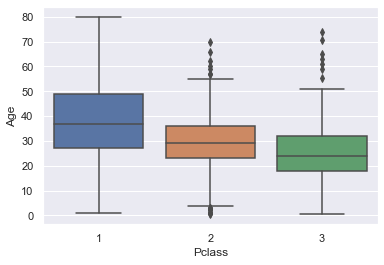

In [78]:
sns.boxplot(x=data['Pclass'],y=data['Age'])

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

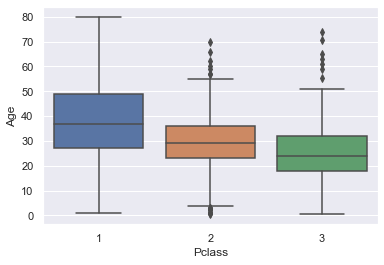

In [79]:
sns.boxplot(data=data,x='Pclass',y='Age')

* 정보를 보면 cabin에 대해서는 정보가 많이 부족하기에, 이 항목은 제거.

In [82]:
# 빵꾸난 데이터 채우거나 지워야 함. 
# 전처리 : 완전한 데이터로 만드는 것

data = data.drop("Cabin", axis=1).dropna()
data.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 1 to 891
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Survived      712 non-null    int64  
 1   Pclass        712 non-null    int64  
 2   Name          712 non-null    object 
 3   Sex           712 non-null    object 
 4   Age           712 non-null    float64
 5   SibSp         712 non-null    int64  
 6   Parch         712 non-null    int64  
 7   Ticket        712 non-null    object 
 8   Fare          712 non-null    float64
 9   Embarked      712 non-null    object 
 10  Age_category  712 non-null    int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 66.8+ KB


* survived/Age/Fare/SibSp/Parch에 대한 pairplot 그려보기

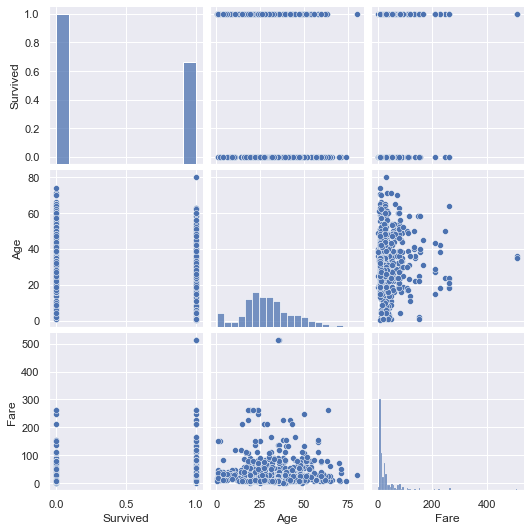

In [83]:
# 많은 데이터와 많은 컬럼이 있는 경우에는 단순하게 pairplot을 하면
# 머신이 다운되거나 메모리 overFlow하면 버벅거림이 심함
# 그럴땐 데이터를 랜덤 샘플링 해서 돌리면 됨.

sns.pairplot(data[["Survived", "Age","Fare"]])


* Pclass, Fare에 대한 boxplot를 그려보시오!

<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

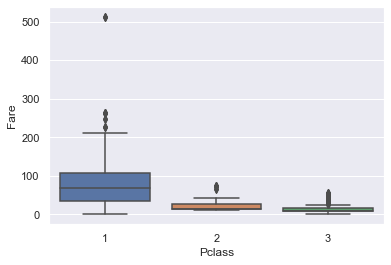

In [84]:
sns.boxplot(data=data, x='Pclass',y='Fare')

* 위의 그래프를 보고, 원본 데이터에 대해서 이상한 아웃라이어를 제거하고 싶음. 그 기준은 0.95 인 quantile에 대한 값으로..수정을 해보자...

<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

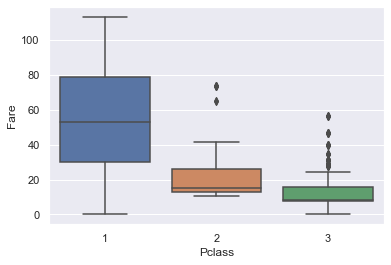

In [85]:
sns.boxplot( x='Pclass',y='Fare', data=data[data["Fare"]<data["Fare"].quantile(.95)])

* Pclass별로 생존 여부 확인 --> 안 좋은 사실이 발견이 됨;;;ㅠㅠ

<AxesSubplot:xlabel='Pclass'>

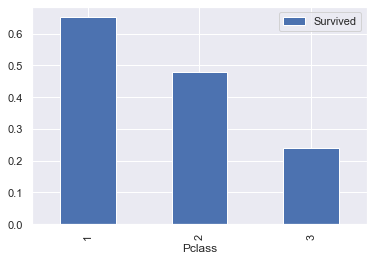

In [86]:
data[["Pclass","Survived"]].groupby(["Pclass"], as_index=True).mean().sort_values(by="Survived", ascending=False).plot(kind="bar")


Text(0.5, 1.0, 'Pclass : Survived vs Death')

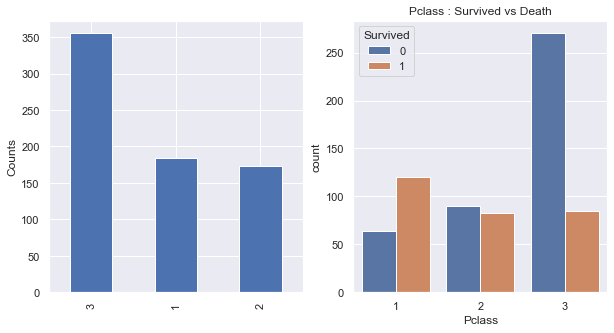

In [91]:
fig, axes = plt.subplots(1,2, figsize=(10,5))
# fig : 그림에 대한 전체 판
# axes : 그림 판 중에서 실제로 내가 그릴 영역...
data["Pclass"].value_counts().plot(kind="bar", ax = axes[0])
axes[0].set_ylabel("Counts")

# 오른쪽 그림은 seaborn 패키지를 활용해서 그림
sns.countplot(data=data,x='Pclass', hue='Survived', ax=axes[1])
axes[1].set_title('Pclass : Survived vs Death')

In [0]:
내가 분석하고자 하는 데이터가 어떠한 내용들이 있는지 확인을 하고 하는 부분이 상당히 중요함!!!!
